In [3]:
# Importing necessary libraries for data manipulation, analysis, and machine learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from sklearn.datasets import load_iris
iris =load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [5]:
df.shape

(150, 5)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
df['target'].unique()

array([0, 1, 2])

In [9]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


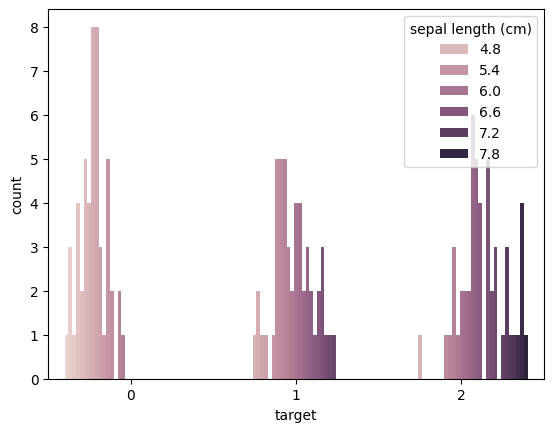

In [12]:
sns.countplot(data=df, x='target', hue='sepal length (cm)');

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

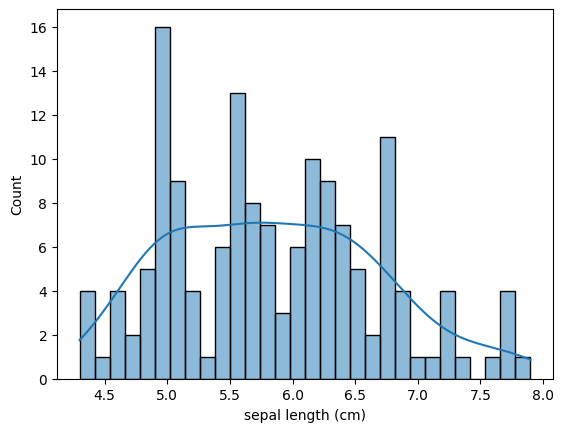

In [13]:
sns.histplot(df['sepal length (cm)'],bins=30,kde=True)

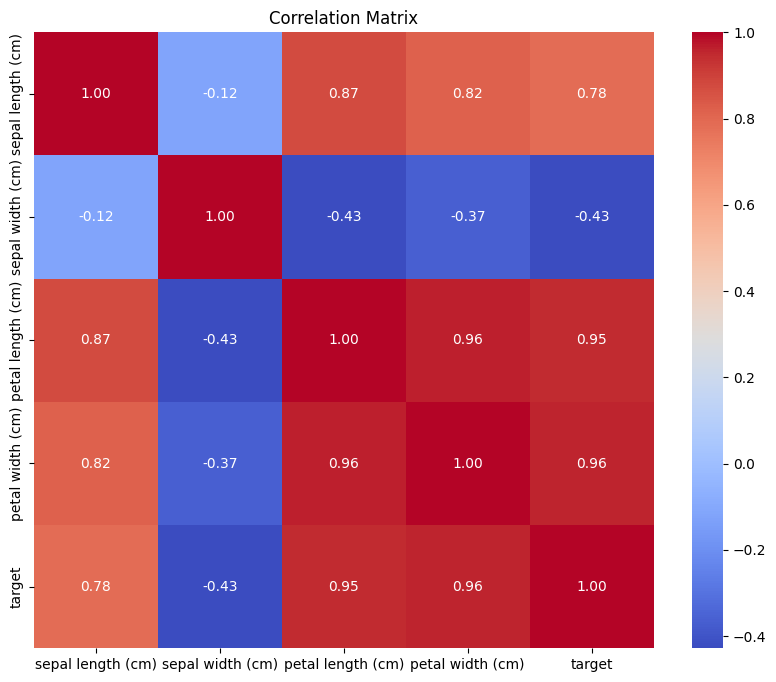

In [14]:
numeric = df.select_dtypes(include=[np.number])
corr_matrix = numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x800 with 0 Axes>

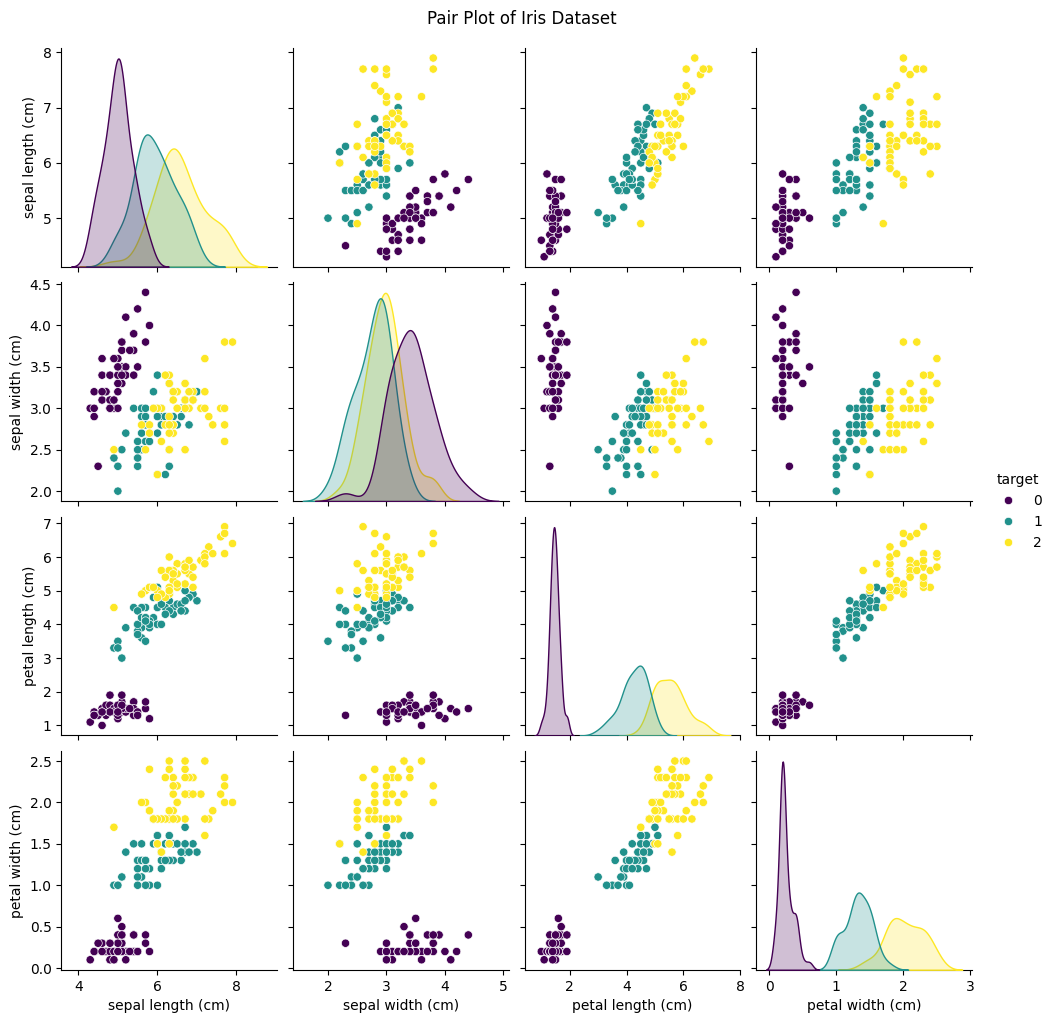

In [23]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='target', palette='viridis')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

<ipython-input-22-bbc8b23d0f2a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='sepal length (cm)', palette='cool')


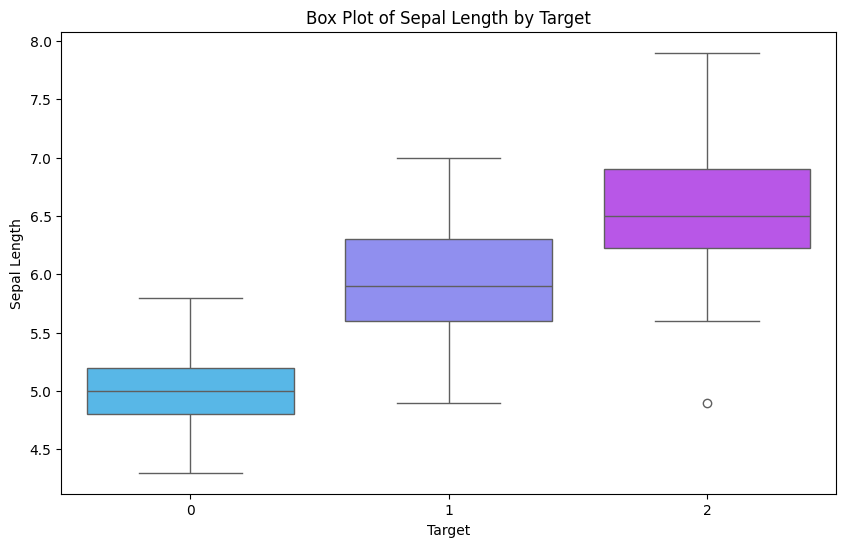

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='sepal length (cm)', palette='cool')
plt.title('Box Plot of Sepal Length by Target')
plt.xlabel('Target')
plt.ylabel('Sepal Length')
plt.show()

<ipython-input-21-6c23b73028de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='target', y='petal length (cm)', palette='muted')


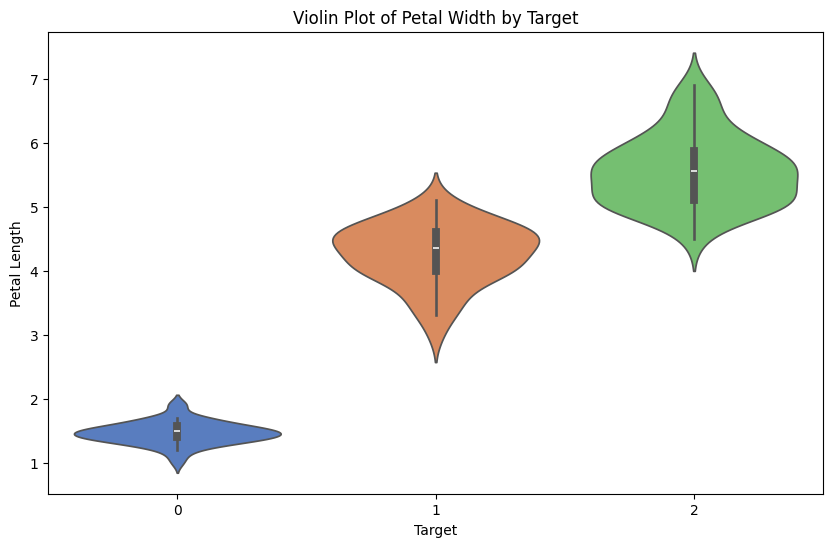

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='target', y='petal length (cm)', palette='muted')
plt.title('Violin Plot of Petal Width by Target')
plt.xlabel('Target')
plt.ylabel('Petal Length')
plt.show()

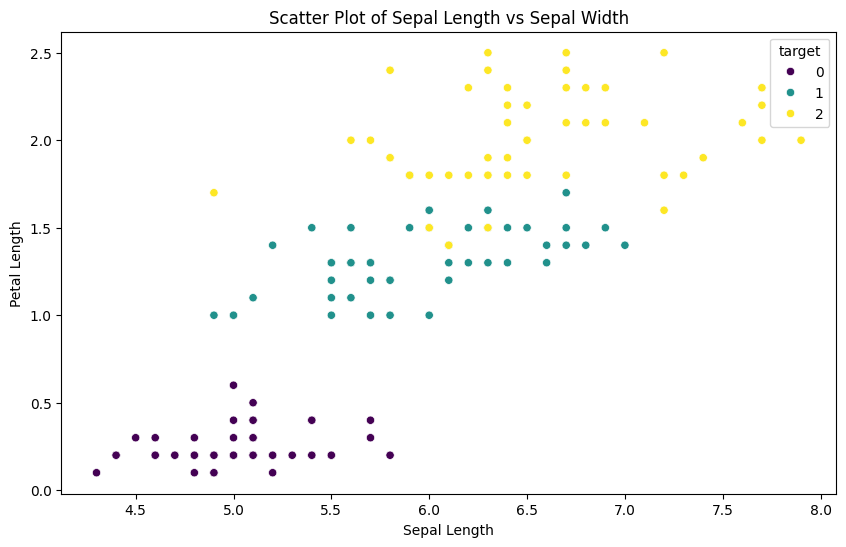

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal width (cm)', hue='target', palette='viridis')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

<ipython-input-26-2553ababe4c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='target', y='sepal length (cm)', palette='cool')


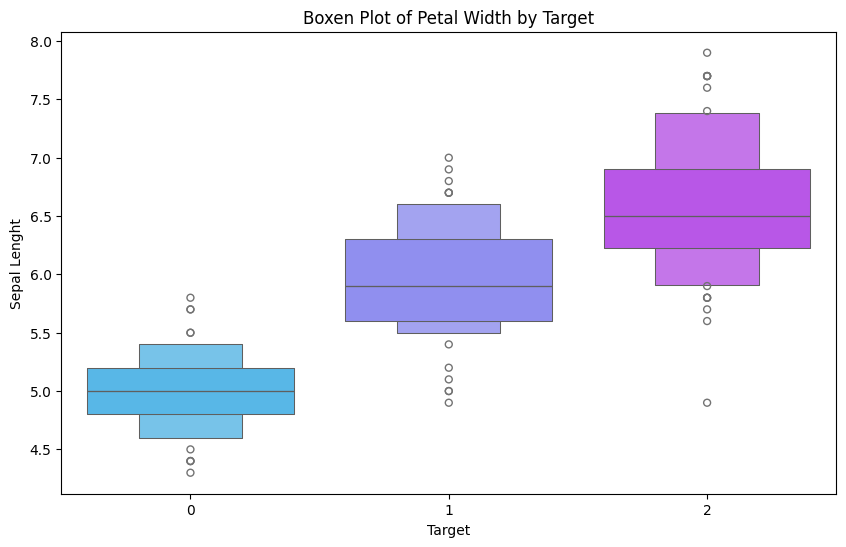

In [26]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=df, x='target', y='sepal length (cm)', palette='cool')
plt.title('Boxen Plot of Petal Width by Target')
plt.xlabel('Target')
plt.ylabel('Sepal Lenght')
plt.show()

In [39]:
import pickle
X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Step 6: Save the model to a pickle file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(tree_clf, model_file)

print("Model and scaler pickle files have been saved successfully.")

Model and scaler pickle files have been saved successfully.


In [29]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred_tree=tree_clf.predict(X_test)
accuracy_tree=accuracy_score(y_test, y_pred_tree)
conf_matrix_tree=confusion_matrix(y_test,y_pred_tree)
class_report_tree=classification_report(y_test,y_pred_tree)
print(f'Decision Tree Classifier Accuracy: {accuracy_tree:.2f}')
print('Confusion Matrix:\n', conf_matrix_tree)
print('Classification Report:\n', class_report_tree)

Decision Tree Classifier Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [32]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred_log_reg=log_reg.predict(X_test)

accuracy_log=accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg=confusion_matrix(y_test,y_pred_log_reg)
class_report_log_reg=classification_report(y_test,y_pred_log_reg)

print(f'Logistic Regression Accuracy: {accuracy_log:.2f}')
print('Confusion Matrix:\n', conf_matrix_log_reg)
print('Classification Report:\n', class_report_log_reg)

Logistic Regression Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [33]:
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)
y_pred_knn=knn_clf.predict(X_test)
accuracy_knn=accuracy_score(y_test, y_pred_knn)
conf_matrix_knn=confusion_matrix(y_test,y_pred_knn)
class_report_knn=classification_report(y_test,y_pred_knn)
print(f'k-NN Accuracy;{accuracy_knn :.2f}')
print('Confusion Matrix:\n', conf_matrix_knn)
print('Classification Report:\n', class_report_knn)

k-NN Accuracy;1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



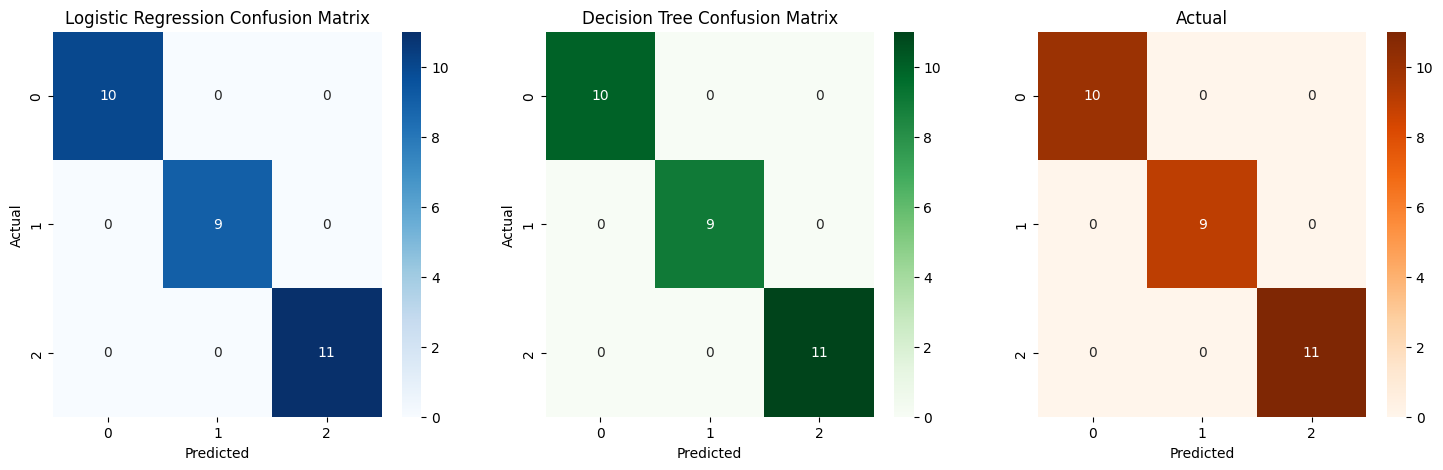

In [35]:
# visualizing the confusion matrices
fig,axes=plt.subplots(1,3, figsize=(18,5))
# Logistic regression
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Decision Tree
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# k-NN
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('k-NN Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_title('Actual')
plt.show()

In [42]:
import pickle
import numpy as np

def predict_iris(sample_input):
    """
    Predict the Iris class for a new sample input.

    Parameters:
    - sample_input (list or array): A list of 4 feature values (sepal length, sepal width, petal length, petal width)

    Returns:
    - Predicted class name (str)
    """
    # Load the scaler and model
    with open(r'/content/scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)

    with open(r'/content/model.pkl', 'rb') as f:
        model = pickle.load(f)

    # Convert input to NumPy array and reshape
    input_array = np.array(sample_input).reshape(1, -1)

    # Scale the input
    input_scaled = scaler.transform(input_array)

    # Predict the class
    prediction = model.predict(input_scaled)

    # Map prediction to class name
    iris_classes = ['setosa', 'versicolor', 'virginica']
    return iris_classes[prediction[0]]

# Example usage:
sample = [5.1, 3.5, 1.4, 0.2]
print("Predicted class:", predict_iris(sample))


Predicted class: setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
